Total                                                    \
ICAO Aeródromo Origem  SBAE SBAU  SBBR SBCA SBCF  SBCY SBGO  SBGR   SBKP SBPA   
Mês Partida Real                                                                
1                       NaN  NaN  31.0  NaN  NaN  27.0  NaN   NaN  111.0  NaN   
2                       NaN  NaN  28.0  NaN  NaN  24.0  NaN   2.0  105.0  NaN   
3                       1.0  1.0  32.0  NaN  NaN  21.0  NaN   7.0  120.0  NaN   
4                       NaN  NaN  35.0  NaN  NaN  25.0  NaN  26.0  134.0  NaN   
5                       NaN  NaN  33.0  NaN  1.0  27.0  NaN  27.0  120.0  NaN   
6                       NaN  NaN  35.0  NaN  NaN  25.0  NaN  30.0  136.0  NaN   
7                       NaN  NaN  36.0  NaN  NaN  40.0  NaN  26.0  125.0  NaN   
8                       NaN  NaN   4.0  NaN  NaN  29.0  NaN  22.0  142.0  NaN   
9                       NaN  NaN  15.0  NaN  NaN  24.0  NaN  21.0  142.0  NaN   
10                      NaN  NaN  12.0  NaN  NaN  28.0  1.0  26.0  124.0  1.0   
11                      NaN  1.0   NaN  NaN  NaN  27.0  NaN  45.0  113.0  NaN   
12                      NaN  NaN   NaN  1.0  NaN  21.0  NaN  46.0  125.0  NaN   

                                                                
ICAO Aeródromo Origem  SBPS  SBRD SBRF  SBRP   SBSP SBSR  SBTG  
Mês Partida Real                                                
1                       8.0   NaN  NaN  27.0  113.0  3.0  25.0  
2                       8.0   NaN  NaN  21.0  113.0  1.0  21.0  
3                      10.0   NaN  NaN  27.0  134.0  3.0  26.0  
4                       8.0   NaN  NaN  24.0  126.0  NaN  24.0  
5                       7.0   NaN  NaN  24.0  132.0  1.0  26.0  
6                      10.0   NaN  NaN  22.0  116.0  2.0  23.0  
7                       8.0  13.0  NaN  38.0  135.0  2.0  16.0  
8                       8.0  24.0  NaN  30.0  140.0  1.0   NaN  
9                      10.0  22.0  NaN  24.0  134.0  2.0   NaN  
10                      8.0  26.0  1.0  29.0  136.0  2.0   NaN  
11                      8.0  17.0  NaN  19.0  135.0  1.0   NaN  
12                     12.0  10.0  NaN  10.0  130.0  1.0   NaN

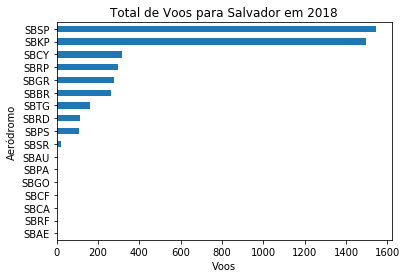

In [55]:
# Questão 1
# Arquivos auxiliares:
    # csv: Todas as planilhas de 2018 (colocar todas numa só pasta: ./data/anac/2018/)
    # Fonte: http://www.anac.gov.br/assuntos/dados-e-estatisticas/historico-de-voos

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
%matplotlib inline

all_csv = glob.glob(r'./data/anac/2018/*.csv')

li = []

for csv in all_csv:
    df_temp = pd.read_csv(csv, encoding='ISO-8859-1', sep=';')
    li.append(df_temp)

df = pd.concat(li, sort=False)


df_ssa = df[['ICAO Empresa Aérea', 'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino', 'Situação Voo', 'Partida Real']]
df_ssa = df_ssa[(df_ssa['Situação Voo'] == 'REALIZADO') & (df_ssa['ICAO Aeródromo Destino'] == 'SBSR')]

qtd_voo = df_ssa.groupby('ICAO Aeródromo Origem').size()

graf_1 = qtd_voo.sort_values(ascending=True).plot(kind='barh', title='Total de Voos para Salvador em 2018')
graf_1.set_xlabel("Voos")
graf_1.set_ylabel("AeC1ródromo")


df_ssa['Partida Real'] = pd.to_datetime(df_ssa['Partida Real'], format='%d/%m/%Y %H:%M')
df_ssa['Mês Partida Real'] = pd.DatetimeIndex(df_ssa['Partida Real']).month
df_ssa['Total'] = 1

df_ssa.pivot_table(index=['Mês Partida Real'], columns=['ICAO Aeródromo Origem'], values=['Total'], aggfunc='count')

**1- Em 2018, qual foi o destino com a maior quantidade de voos chegando a Salvador? E por mês, há diferença?**

Com o total de 4598 voos realizados para Salvador (SBSR) em 2018, o aeródromo que mais contabilizou destino foi SBSP (São Paulo), com 1544.

A partir da filtragem por voos realizados e o aeródromo de destino (no caso, SBSR - Salvador), é possível determinar, através de uma contagem via GroupBy mais a coluna de aeródromo de origem, qual foi o que mais teve destino a Salvador, ordenando no gráfico para facilitar a visulização do resultado final.

Apesar de São Paulo ter sido o aeródromo com maior destino, no mês-a-mês é possível identificar uma variação leve com SBKP (Viracopos), conforme dados da tabela dinâmica:

Janeiro: SBSP (113);
Fevereiro: SBSP (113);
Março: SBSP (134);
**Abril: SBKP (134)**;
Maio: SBSP (132);
**Junho: SBKP (136)**;
Julho: SBSP (135);
**Agosto: SBKP (142) **;
**Setembro: SBKP (142) **;
Outubro: SBSP (136);
Novembro: SBSP (135);
Dezembro: SBSP (130).

Text(0, 0.5, 'Atrasos')

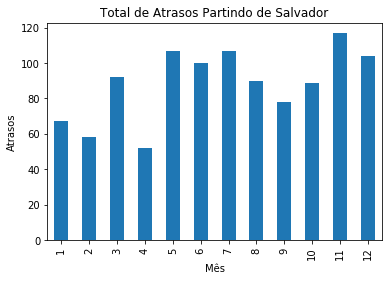

In [57]:
# Questão 2
# Arquivos auxiliares:
    # csv: Todas as planilhas de 2018 (colocar todas numa só pasta: ./data/anac/2018/)
    # Fonte: http://www.anac.gov.br/assuntos/dados-e-estatisticas/historico-de-voos

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
%matplotlib inline

all_csv = glob.glob(r'./data/anac/2018/*.csv')

li = []

for csv in all_csv:
    df_temp = pd.read_csv(csv, encoding='ISO-8859-1', sep=';')
    li.append(df_temp)

df = pd.concat(li, sort=False)


df['Tempo'] = pd.to_datetime(df['Partida Real'], format='%d/%m/%Y %H:%M') - pd.to_datetime(df['Partida Prevista'], format='%d/%m/%Y %H:%M')
df['Atraso'] = np.where(df['Tempo'] > '00:00:00', 'SIM', 'NAO')

df = df[(df['Situação Voo'] == 'REALIZADO') & (df['ICAO Aeródromo Origem'] == 'SBSR') & (df['Atraso'] == 'SIM')]

df['Mes voo'] = pd.DatetimeIndex(pd.to_datetime(df['Partida Real'], format='%d/%m/%Y %H:%M')).month

qtd_voo = df.groupby('Mes voo').size()

graf = qtd_voo.plot(kind='bar', title='Total de Atrasos Partindo de Salvador')
graf.set_xlabel("Mês")
graf.set_ylabel("Atrasos")

**2- Ainda em 2018, qual foi o mês que houve a maior quantidade de atrasos de voos saindo do aeroporto de Salvador?**

O mês que houve mais atrasos, saindo de Salvador, foi Novembro, com o total de 117 voos.

Para isto, primeiramente, é preciso descobrir o "delta tempo" entre Partida Real x Partida Prevista, ou seja, saber se o horário de saída real foi maior ou não que o horário previsto; em seguida, determinar se o voo em questão houve ou não atraso na partida, caso sim, é possível identificar através de contagem, via GroupBy, qual foi o mês que houve mais ocorrências.

Text(0, 0.5, 'Ocorrências de voo')

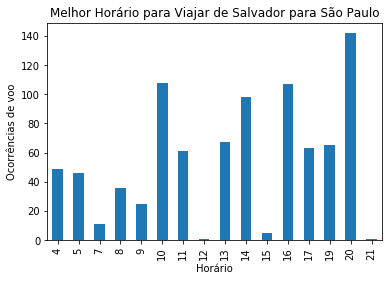

In [59]:
# Questão 3
# Arquivos auxiliares:
    # csv: Todas as planilhas de 2018 (colocar todas numa só pasta: ./data/anac/2018/)
    # Fonte: http://www.anac.gov.br/assuntos/dados-e-estatisticas/historico-de-voos

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
%matplotlib inline

all_csv = glob.glob(r'./data/anac/2018/*.csv')

li = []

for csv in all_csv:
    df_temp = pd.read_csv(csv, encoding='ISO-8859-1', sep=';')
    li.append(df_temp)

df = pd.concat(li, sort=False)


df['Atraso Partida'] = np.where(pd.to_datetime(df['Partida Real'], format='%d/%m/%Y %H:%M') - pd.to_datetime(df['Partida Prevista'], format='%d/%m/%Y %H:%M') > '00:00:00', 'SIM', 'NAO')
df['Atraso Chegada'] = np.where(pd.to_datetime(df['Chegada Real'], format='%d/%m/%Y %H:%M') - pd.to_datetime(df['Chegada Prevista'], format='%d/%m/%Y %H:%M') > '00:00:00', 'SIM', 'NAO')

df = df[(df['Situação Voo'] == 'REALIZADO') & (df['ICAO Aeródromo Origem'] == 'SBSR') & (df['ICAO Aeródromo Destino'] == 'SBSP') & (df['Atraso Partida'] == 'NAO') & (df['Atraso Chegada'] == 'NAO')]

df['Tempo viagem'] = pd.to_datetime(df['Chegada Real'], format='%d/%m/%Y %H:%M') - pd.to_datetime(df['Partida Real'], format='%d/%m/%Y %H:%M')
df['Hora Partida'] = pd.DatetimeIndex(pd.to_datetime(df['Partida Real'], format='%d/%m/%Y %H:%M')).hour

hr = df.groupby('Hora Partida').size()

graf = hr.plot(kind='bar', title='Melhor Horário para Viajar de Salvador para São Paulo')
graf.set_xlabel("Horário")
graf.set_ylabel("Ocorrências de voo")

**3- Na sua opinião, qual o melhor horário para ir de Salvador à São Paulo? Por que?**

Para chegar a esta conclusão, foram selecionados voos que não tiveram atrasos nem na partida e nem na chegada, ou seja, voos que saíram no horário previsto, chegaram no horário previsto ou que conseguiram se antecipar nos respectivos horários; caso contrário, indícios de atraso apontam falha no serviço, logo esses voos devem ser descartados da análise. Após esta filtragem, há também para voos realizados somente de Salvador a São Paulo.

Agora que temos os voos com os melhores níveis de serviço, é possível identificar através do tempo de viagem x horário de partida o melhor horário para ir de Salvador a São Paulo. Foi constatado que o horário com maior número de ocorrências, dentro das condições descritas acima, é às 19h, com 142, conforme aponta o gráfico.

Resumindo, é preciso, primeiramente, analisar se os horários de partida e chegada foram cumpridos, e depois qual é o horário com o maior número de ocorrências com base neste nível de serviço (que é considerado satisfatório).

In [28]:
# Questão 4
# Arquivos auxiliares:
    # csv: Planilhas de Janeiro e Fevereiro de 2016, 2017 e 2018 (colocar todas numa só pasta: ./data/anac/outros/)
    # Fonte: http://www.anac.gov.br/assuntos/dados-e-estatisticas/historico-de-voos

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
%matplotlib inline

all_csv = glob.glob(r'./data/anac/outros/*.csv')

li = []

for csv in all_csv:
    df_temp = pd.read_csv(csv, encoding='ISO-8859-1', sep=';')
    li.append(df_temp)

df = pd.concat(li, sort=False)


df['Atraso Chegada'] = np.where(pd.to_datetime(df['Chegada Real'], format='%d/%m/%Y %H:%M') - pd.to_datetime(df['Chegada Prevista'], format='%d/%m/%Y %H:%M') > '00:00:00', 'SIM', 'NAO')

df['Ano'] = pd.DatetimeIndex(pd.to_datetime(df['Partida Real'], format='%d/%m/%Y %H:%M')).year
df['Mes'] = pd.DatetimeIndex(pd.to_datetime(df['Partida Real'], format='%d/%m/%Y %H:%M')).month

df = df[(df['Situação Voo'] == 'REALIZADO') & (df['Atraso Chegada'] == 'SIM') & (df['Ano'] > 2015) & (df['Mes'] >= 1) & (df['Mes'] <= 2)]

df.pivot_table(index=['Ano', 'Mes'], values=['Atraso Chegada'], aggfunc='count')

Atraso Chegada
Ano    Mes                
2016.0 1.0           15709
       2.0           11947
2017.0 1.0           15008
       2.0           11019
2018.0 1.0           16973
       2.0           13514

**4. Os dados de Fevereiro ainda não foram disponibilizados. Baseados nos dados de anos anteriores, devo esperar um aumento ou diminuição no número de atrasos em relação a Janeiro deste ano.**

Para se basear em um ecossistema atual e evitar que circunstâncias defasadas (políticas, sociais, etc.) de muitos anos atrás interfiram na assertividade da análise, foram utilizados dados de 2016 a 2018.

O primeiro passo é juntar as bases de Janeiro e Fevereiro de 2016 a 2018, em seguida definir o ano e mês de cada registro, então filtrar os voos realizados que chegaram com atraso.

Na tabela dinâmica é possível notar nos 3 anos uma queda significativa de Janeiro para Fevereiro:
2016: -3762 atrasos (-13,5%);
2017: -3989 atrasos (-13,6%);
2018: -3459 atrasos (-12,6%);

Com uma média de -3762 (-13,2%) nos atrasos de Janeiro para Fevereiro, o fato de Dezembro-Janeiro serem meses de férias e recesso, ou seja, muitas pessoas viajando, justifica a sobrecarga nos aeródromos do país e consequentemente o acréssimo de atrasos.

In [62]:
# Análise de dados sobre dados da ANAC.
# Fonte: http://www.anac.gov.br/assuntos/dados-e-estatisticas/historico-de-voos 

# $ sudo apt-get update
# $ sudo apt-get install -y python3-pip build-essential libssl-dev libffi-dev python-dev python3-venv jupyter-notebook
# $ mkdir ~/app/data/anac/2018/
# $ mkdir ~/app/data/anac/outros/
# $ cd ~/app/
# $ virtualenv -p python3 env
# $ source /env/bin/activate
# $ pip3 install jupyter matplotlib numpy
# $ jupyter notebook